In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.contrib.slim as slim
import matplotlib.pyplot as plt

In [16]:
tables = pd.read_html('https://finance.naver.com/item/sise_day.nhn?code=005930&page=1',
                     encoding='cp949')
len(tables)

2

In [17]:
for table in tables:
    print(table.shape)

(15, 7)
(1, 12)


In [23]:
data = tables[0]
data = data.dropna() # 누락 행 제거

In [38]:
data

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2019.07.29,46100.0,1050.0,46800.0,47050.0,46000.0,6847014.0
2019.07.26,47150.0,50.0,46650.0,47150.0,46550.0,7873886.0
2019.07.25,47200.0,800.0,47150.0,47200.0,46600.0,8408838.0
2019.07.24,46400.0,900.0,47100.0,47150.0,46250.0,8756522.0
2019.07.23,47300.0,100.0,47350.0,47550.0,47050.0,9061381.0
2019.07.22,47200.0,400.0,46800.0,47300.0,46600.0,9009109.0
2019.07.19,46800.0,700.0,46650.0,46950.0,46600.0,8819393.0
2019.07.18,46100.0,50.0,46450.0,46450.0,45650.0,5143554.0
2019.07.17,46050.0,800.0,46150.0,46350.0,45950.0,5216602.0


In [24]:
data = data.set_index('날짜')

In [27]:
arr = np.array(data)
arr.shape

(10, 6)

In [44]:
x = arr[:, :-2] 
y = arr[:, -2:] 
#y = np.stack((arr[:, 0], arr[:, -1]), axis=1) #종가와 거래량를 차원 1 에 붙여라
y.shape

(10, 2)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x,y)
model.score(x,y)

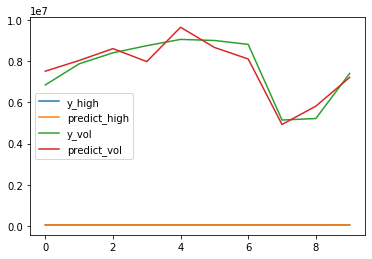

In [43]:
high_vol = model.predict(x)
plt.plot(y[:,0], label='y_high')
plt.plot(high_vol[:,0], label='predict_high')
plt.plot(y[:,1], label='y_vol')
plt.plot(high_vol[:,1], label='predict_vol')
plt.legend()

In [20]:
data = pd.read_clipboard() #드래그 복사 후 
data

,날짜,종가,전일비,시가,고가,저가,거래량
0,2019.07.15,"46,450",상승 150,"45,950","46,650","45,750","4,717,226"
1,2019.07.12,"46,300",상승 100,"46,350","46,400","45,800","5,245,804"
2,2019.07.11,"46,200",상승 650,"46,350","46,550","46,150","10,989,751"
3,2019.07.10,"45,550",상승 450,"45,550","46,150","45,500","9,253,930"
4,2019.07.09,"45,100",상승 700,"44,850","45,450","44,700","7,646,421"
5,2019.07.08,"44,400","하락 1,250","44,750","44,800","44,350","7,823,843"
6,2019.07.05,"45,650",하락 350,"45,950","45,950","45,250","7,235,395"
7,2019.07.04,"46,000",상승 600,"45,250","46,200","45,250","6,365,573"
8,2019.07.03,"45,400",하락 850,"45,750","46,350","45,200","9,669,368"
9,2019.07.02,"46,250",하락 350,"46,200","46,900","45,850","8,463,073"
